
# Covid-19: comparación entre paises 

Datos actualizados a diario tomados desde: [CSSEGISandData / COVID-19](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data)

La idea es hacer algo del estilo [herokuapp](https://covid-19-raffg.herokuapp.com/)


### Parte 1 (20 minutos)

1) Obtener los datos desde los siguientes links para usarlos en Colab:

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

2) Armar dataframes cargando los csv descargados

Para el dataframe de casos confirmados:

3) Verificar si hay países repetidos. Se puede utilizar la función value_counts().

4) Si hay países repetidos, analizar por qué se repiten (se puede seleccionar el país repetido más veces y ver las filas correspondientes).
En base al análisis, transformar las filas repetidas en una fila única haciendo uso de la función groupby(), y eliminar las columnas que ya no sean necesarias utilizando la función drop() usando como argumento axis=1 asi tira columnas en lugar de filas.

In [ ]:
#Item 1

!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

In [ ]:
#@title
#Item 2

import pandas as pd

df_confirmed = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')
df_death = pd.read_csv('time_series_covid19_deaths_global.csv')

In [ ]:
df_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2449,2449,2451,2451,2451,2451,2454,2454,2457,2459,2460,2460,2462,2462,2462,2463,2464,2466,2466,2467,2467,2469,2470,2472,2476,2484,2489,2495,2496,2497,2508,2512,2512,2516,2521,2521,2521,2529,2529,2532
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1918,1939,1956,1969,1986,2002,2018,2030,2045,2060,2077,2092,2106,2122,2133,2137,2145,2156,2171,2184,2192,2204,2210,2216,2227,2235,2241,2247,2256,2265,2274,2283,2291,2297,2304,2310,2317,2321,2326,2331
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3010,3013,3018,3022,3026,3028,3031,3034,3036,3040,3045,3048,3051,3053,3055,3057,3061,3066,3069,3071,3074,3077,3080,3084,3089,3093,3096,3099,3102,3105,3108,3112,3116,3119,3123,3126,3130,3134,3137,3141
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,112,112,112,112,112,112,112,112,113,113,113,113,113,113,113,113,113,113,114,114,114,115,115,115,115,115,115,116,117,117,117,117,119,120,120,120,120,121,121,121
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,512,514,515,516,516,517,519,520,521,521,522,522,522,524,526,527,530,530,532,532,532,533,533,534,536,537,538,538,540,542,543,547,547,549,549,550,553,554,554,557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
270,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2127,2140,2157,2170,2193,2211,2228,2255,2268,2293,2314,2343,2358,2379,2406,2427,2458,2478,2501,2521,2537,2557,2581,2599,2614,2627,2645,2661,2681,2706,2716,2735,2753,2781,2812,2838,2860,2883,2901,2923
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,650,651,653,654,661,667,679,683,689,698,707,713,723,733,737,751,771,785,800,810,820,832,851,863,882,888,906,916,932,946,955,976,986,1004,1022,1031,1049,1068,1073,1083
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1116,1124,1132,1137,1140,1148,1149,1153,1158,1164,1167,1170,1175,1178,1178,1179,1182,1185,1187,1191,1194,1198,1200,1200,1202,1208,1212,1215,1215,1220,1222,1224,1224,1225,1226,1226,1226,1227,1229,1229


In [ ]:
df_confirmed['Country/Region'].value_counts()

#Hay paises como China con más de una fila

China             33
Canada            16
United Kingdom    12
France            12
Australia          8
                  ..
Venezuela          1
Cabo Verde         1
Costa Rica         1
Montenegro         1
Monaco             1
Name: Country/Region, Length: 192, dtype: int64

In [ ]:
df_confirmed[df_confirmed['Country/Region'] == 'China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21
58,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994,994
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1050,1050,1052,1052,1053,1053,1054,1055,1056,1057,1057,1057,1057
60,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591
61,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,551,552,552,552,553,553,553,555,556,556,557,557,557,557,557,559,559,559,559,560,560,560,560,560,561,561,561,570,571,572,572,573,573,574,576,576,580,581,582,582
62,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,187,187,187,187,187,187,187,187,187,187,187,187,187,187,190,190,190,191,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193,193
63,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,...,2229,2233,2235,2236,2238,2240,2243,2244,2245,2245,2245,2246,2249,2251,2252,2253,2257,2259,2263,2265,2266,2267,2275,2277,2279,2282,2282,2285,2287,2287,2289,2290,2291,2295,2295,2296,2299,2301,2304,2308
64,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,...,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,270,270,270,270,270
65,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,...,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
66,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,...,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
67,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,131

In [ ]:
#Veamos que pasa con China para que se repita:

confirmados_china = df_confirmed[df_confirmed['Country/Region'] == 'China']
confirmados_china.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,990,990,990,990,990,990,990,990,990,990,990,990,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,573,577,577,580,580,582,584,585,586,587,587,588,588,588,589,589,589,589,590,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,578,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,337,338,340,343,345,345,349,350,350,350,351,351,351,351,351,352,352,353,353,353,354,355,355,355,355,355,355,355,355,355,355,355,355,356,356,356,356,356,356,356
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,136,138,138,138,138,138,138,138,138,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139


In [ ]:
#Podemos observar que hay entradas para cada provincia. La manera mas razonable de combinar los casos, es sumar los de todas las provincias asi tenemos el total por pais.
#Para eso vamos a agrupar por pais y calcular la suma.

#Primero tiramos la columna de provincia que no nos va a servir:

#df_confirmed = df_confirmed.drop('Province/State',axis=1)

df_confirmed_sum = df_confirmed.groupby('Country/Region').sum()
df_confirmed_sum

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645,118799,118975
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581,12614,12641
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549,23697,23841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2501,2512,2524,2526,2529,2533,2550,2553,2554,2557,2560,2567,2570,2571,2572,2572,2575,2575,2576,2579,2586,2586,2591,2594,2594,2603,2617,2620,2626,2631,2637,2648,2659,2668,2683,2692,2693,2705,2714,2733
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,194548,196812,198554,200382,202378,203669,205652,207436,209304,211602,213791,215984,218061,219912,221391,223638,225976,228044,230076,232038,233549,234748,236462,238248,240065,242353,244645,246893,248482,251288,253922,256461,259133,262017,264395,265897,268132,270856,272767,274690
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2444,2473,2545,2586,2627,2667,2729,2771,2836,2908,2969,3037,3126,3217,3278,3418,3516,3612,3703,3816,3900,3969,4033,4115,4247,4357,4531,4620,4697,4798,4881,4975,5047,5133,5233,5276,5357,5446,5507,5582


In [ ]:
{k:v for k,v in [('a',1),('b',2),('c',3)]}

{'a': 1, 'b': 2, 'c': 3}

In [ ]:
#Desafio:

#Hay un problema que es que estamos sumando no solo los casos, sino que tambien las latitudes y longitudes. 
#Quizas para esas columnas nos conviene promediar en vez de sumar

#Hagamos 2 grupos de columnas:
columnas_geograficas = ['Lat','Long']

#Esto es equivalente a:
"""columnas_fechas = []
for col in df_confirmed.columns:
  if col not in columnas_geograficas:
    columnas_fechas.append(col)"""
columnas_fechas = [col for col in df_confirmed.columns if col not in columnas_geograficas]

df_fechas = df_confirmed[columnas_fechas].groupby('Country/Region').sum()
df_latlon = df_confirmed[columnas_geograficas + ['Country/Region']].groupby('Country/Region').mean()

df_confirmed_grouped = pd.concat([df_latlon,df_fechas],axis=1)
df_confirmed_grouped

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645,118799,118975
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581,12614,12641
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549,23697,23841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2501,2512,2524,2526,2529,2533,2550,2553,2554,2557,2560,2567,2570,2571,2572,2572,2575,2575,2576,2579,2586,2586,2591,2594,2594,2603,2617,2620,2626,2631,2637,2648,2659,2668,2683,2692,2693,2705,2714,2733
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,194548,196812,198554,200382,202378,203669,205652,207436,209304,211602,213791,215984,218061,219912,221391,223638,225976,228044,230076,232038,233549,234748,236462,238248,240065,242353,244645,246893,248482,251288,253922,256461,259133,262017,264395,265897,268132,270856,272767,274690
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2444,2473,2545,2586,2627,2667,2729,2771,2836,2908,2969,3037,3126,3217,3278,3418,3516,3612,3703,3816,3900,3969,4033,4115,4247,4357,4531,4620,4697,4798,4881,4975,5047,5133,5233,5276,5357,5446,5507,5582


In [ ]:
.loc['Argentina','Buenos Aires']

### Parte 2 (20 minutos)

Con el dataframe de confirmados:

1) Usar describe() para ver estadisticas

2) Hacer un gráfico de barras mostrando los 10 países con mayor número de casos confirmados al último día disponible. Usar la función barplot() de seaborn.

3) En qué puesto se encuentra la Argentina? Para esto, primero ordenar los paises por número de casos confirmados, y luego obtener la posición utilizando .index.get_loc('Argentina')


In [ ]:
#@title
#Item 1

df_confirmed_sum.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,...,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02
mean,29.197925,32.743141,2.901042,3.411458,4.901042,7.463542,11.031250,15.244792,29.052083,32.119792,42.890625,51.703125,62.697917,87.432292,103.578125,124.468750,143.973958,160.432292,179.145833,193.385417,209.166667,222.755208,233.390625,235.567708,314.489583,348.484375,359.645833,371.015625,381.614583,391.416667,394.020833,396.937500,400.213542,409.385417,411.364583,414.302083,418.744792,423.833333,430.916667,438.135417,...,6.070191e+05,6.089374e+05,6.104933e+05,6.126530e+05,6.150857e+05,6.175695e+05,6.201181e+05,6.224833e+05,6.243603e+05,6.261775e+05,6.286411e+05,6.314499e+05,6.343339e+05,6.372593e+05,6.398573e+05,6.420621e+05,6.442330e+05,6.469114e+05,6.502113e+05,6.536037e+05,6.569441e+05,6.599888e+05,6.624365e+05,6.648241e+05,6.677838e+05,6.713422e+05,6.750494e+05,6.783501e+05,6.811076e+05,6.839868e+05,6.865367e+05,6.896830e+05,6.932473e+05,6.976215e+05,7.015176e+05,7.049786e+05,7.085762e+05,7.117878e+05,7.158480e+05,7.201034e+05
std,98.920713,300.279236,39.546587,46.401531,66.389739,101.461306,149.737184,207.613433,397.554774,439.264320,587.493757,707.355654,858.108368,1200.111459,1422.818736,1710.837222,1980.238741,2207.349005,2461.576792,2656.710224,2874.293720,3056.500118,3203.142753,3230.054726,4322.388234,4788.798763,4937.090063,5088.635102,5227.266766,5355.511972,5384.966219,5417.992827,5452.084478,5556.751420,5558.258169,5574.099614,5611.136553,5641.005206,5672.788833,5697.318447,...,2.446547e+06,2.451814e+06,2.456065e+06,2.462172e+06,2.468765e+06,2.475516e+06,2.482506e+06,2.488774e+06,2.493319e+06,2.498615e+06,2.505200e+06,2.512534e+06,2.520049e+06,2.527678e+06,2.534712e+06,2.539654e+06,2.545529e+06,2.552501e+06,2.562234e+06,2.571163e+06,2.580326e+06,2.588604e+06,2.594657e+06,2.601723e+06,2.609563e+06,2.618751e+06,2.628825e+06,2.637892e+06,2.645636e+06,2.652232e+06,2.660543e+06,2.669726e+06,2.680361e+06,2.692190e+06,2.703833e+06,2.714147e+06,2.723675e+06,2.733639e+06,2.746129e+06,2.758853e+06
min,-256.850200,-1202.597900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


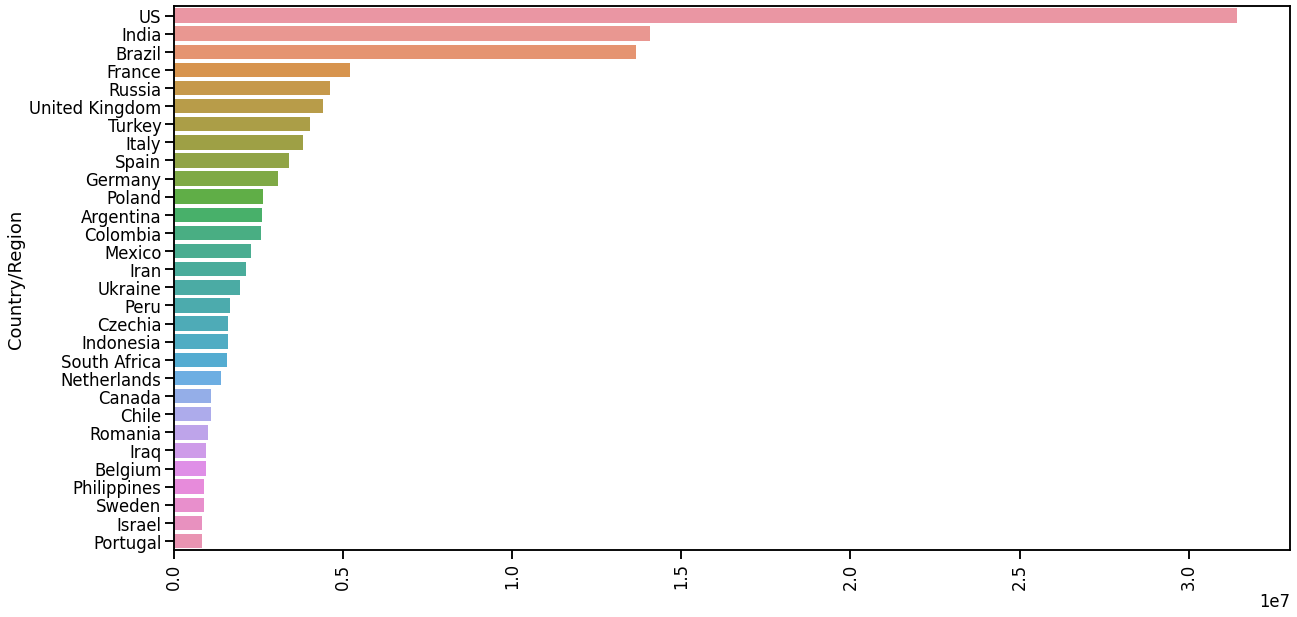

In [ ]:

#Item 2

import seaborn as sns
import matplotlib.pyplot as plt

ultima_fecha = df_confirmed_sum.columns[-1]
top10 = df_confirmed_sum[ultima_fecha].sort_values(ascending=False).head(30)

plt.figure(figsize=(20,10))

sns.set_context('talk')
x = top10.index
y = top10.values

plt.xticks(rotation=90)

sns.barplot(y,x,orient='h')

In [ ]:
top10

Country/Region
US                31421360
India             14074564
Brazil            13673507
France             5210772
Russia             4613646
United Kingdom     4393330
Turkey             4025557
Italy              3809193
Spain              3387022
Germany            3085142
Poland             2621116
Argentina          2604157
Colombia           2585801
Mexico             2291246
Iran               2143794
Ukraine            1939901
Peru               1667737
Czechia            1590124
Indonesia          1583182
South Africa       1561559
Name: 4/14/21, dtype: int64

In [ ]:
#Item 3

df_confirmed_sum[ultima_fecha].sort_values(ascending=False).index.get_loc('Argentina') + 1

12

### Parte 3 (25 minutos)

1) Para Argentina, hacer un gráfico mostrando la evolución en el número de casos confirmados. Utilizar la función plot de matplotlib. Graficar desde la fecha en la que ocurrió el primer caso.

2) En un mismo gráfico mostrar también la evolución de casos confirmados de otros 3 países. Si se llama reiteradas veces a plot, es posible superponer las curvas. Todos los países deberan comenzar desde el primer día con casos, a fin de hacer una comparación justa.

Tip: usar range(len(casos_pais)) para el eje x del plot

Extra:

3) Para Argentina, graficar los casos diarios. Para esto, se puede utilizar la función de numpy diff(), la cual calcula diferencias sucesivas.

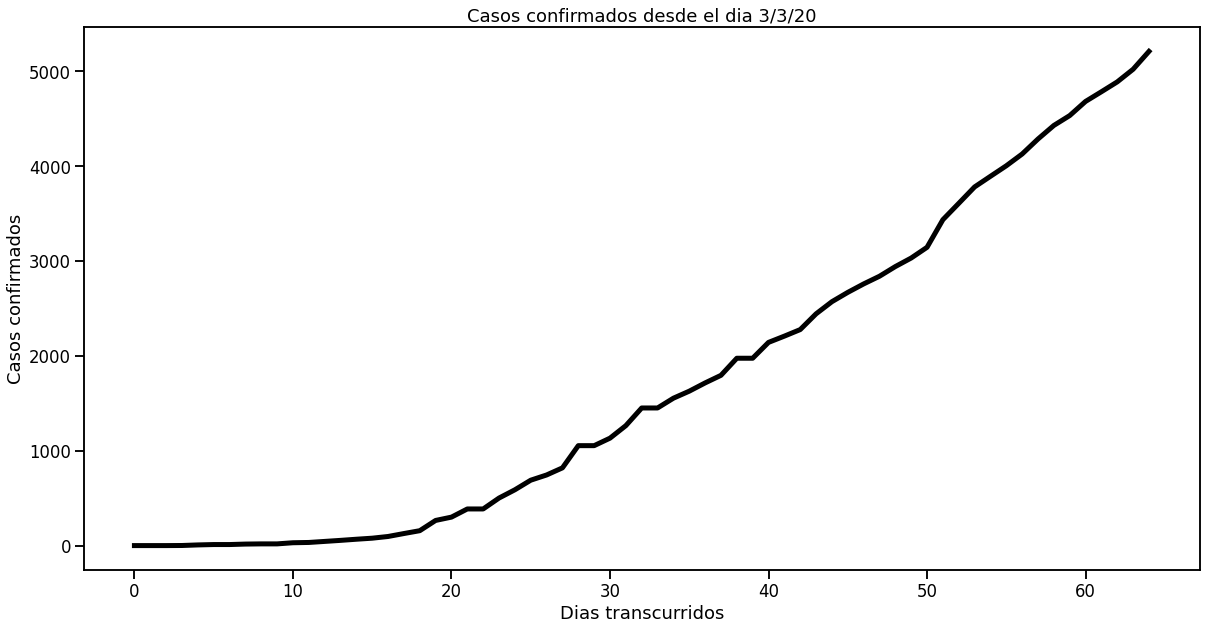

In [ ]:
#@title
#Item 1

casos_argentina = df_confirmed_sum.loc['Argentina']
casos_argentina = casos_argentina[casos_argentina > 0]

x = range(len(casos_argentina))
y = casos_argentina.values

plt.figure(figsize=(20,10))

primer_dia = casos_argentina.index[0]
plt.title('Casos confirmados desde el dia {}'.format(primer_dia))
plt.ylabel('Casos confirmados')
plt.xlabel('Dias transcurridos')

plt.plot(x,y,'-k',lw=5)

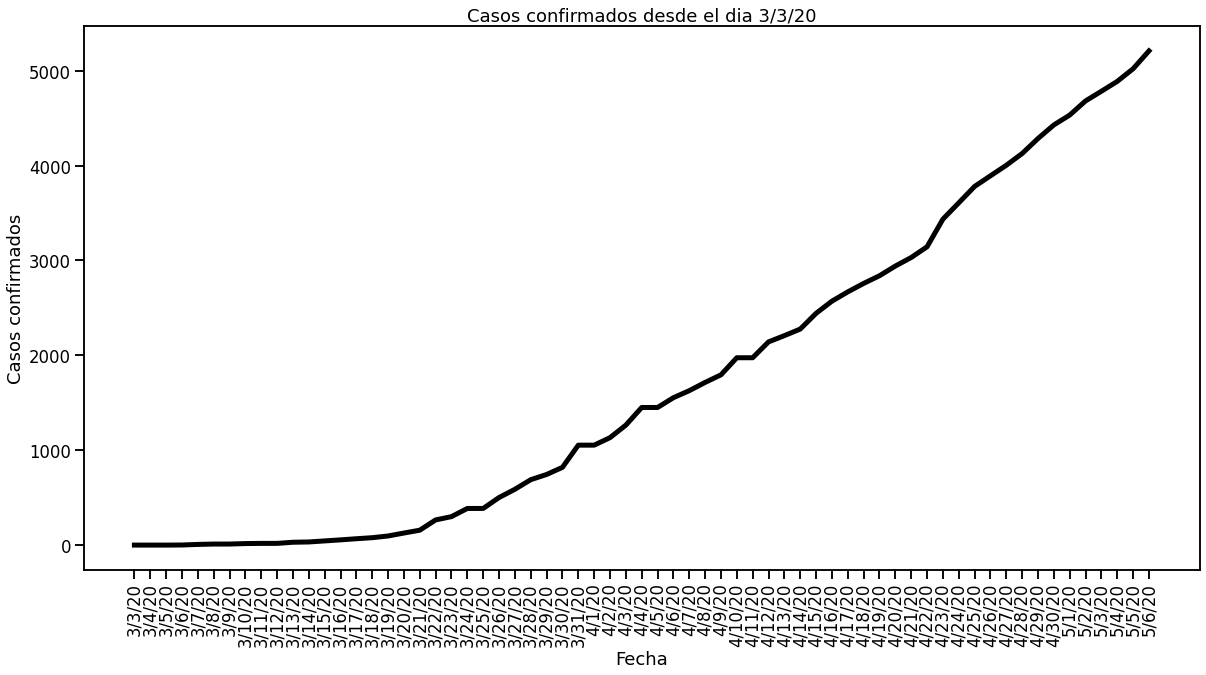

In [ ]:
#@title
#Mostrando en el eje x fechas

x = casos_argentina.index
y = casos_argentina.values

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

primer_dia = casos_argentina.index[0]
plt.title('Casos confirmados desde el dia {}'.format(primer_dia))
plt.ylabel('Casos confirmados')
plt.xlabel('Fecha')

plt.plot(x,y,'-k',lw=5)

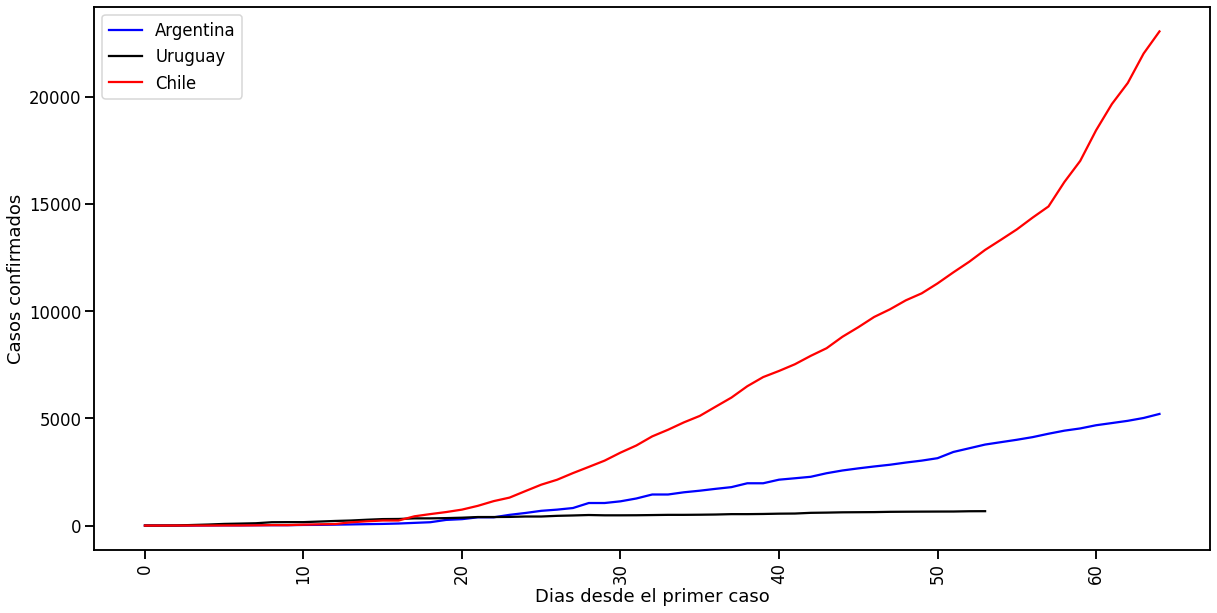

In [ ]:
#@title
#Item 2

casos_argentina = df_confirmed_sum.loc['Argentina']
casos_argentina = casos_argentina[casos_argentina > 0]

casos_uruguay = df_confirmed_sum.loc['Uruguay']
casos_uruguay = casos_uruguay[casos_uruguay > 0]

casos_chile = df_confirmed_sum.loc['Chile']
casos_chile = casos_chile[casos_chile > 0]

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xlabel('Dias desde el primer caso')
plt.ylabel('Casos confirmados')

plt.plot(range(len(casos_argentina)),casos_argentina.values,'-b',label='Argentina')
plt.plot(range(len(casos_brasil)),casos_brasil.values,'-k',label='Uruguay')
plt.plot(range(len(casos_chile)),casos_chile.values,'-r',label='Chile')

plt.legend()

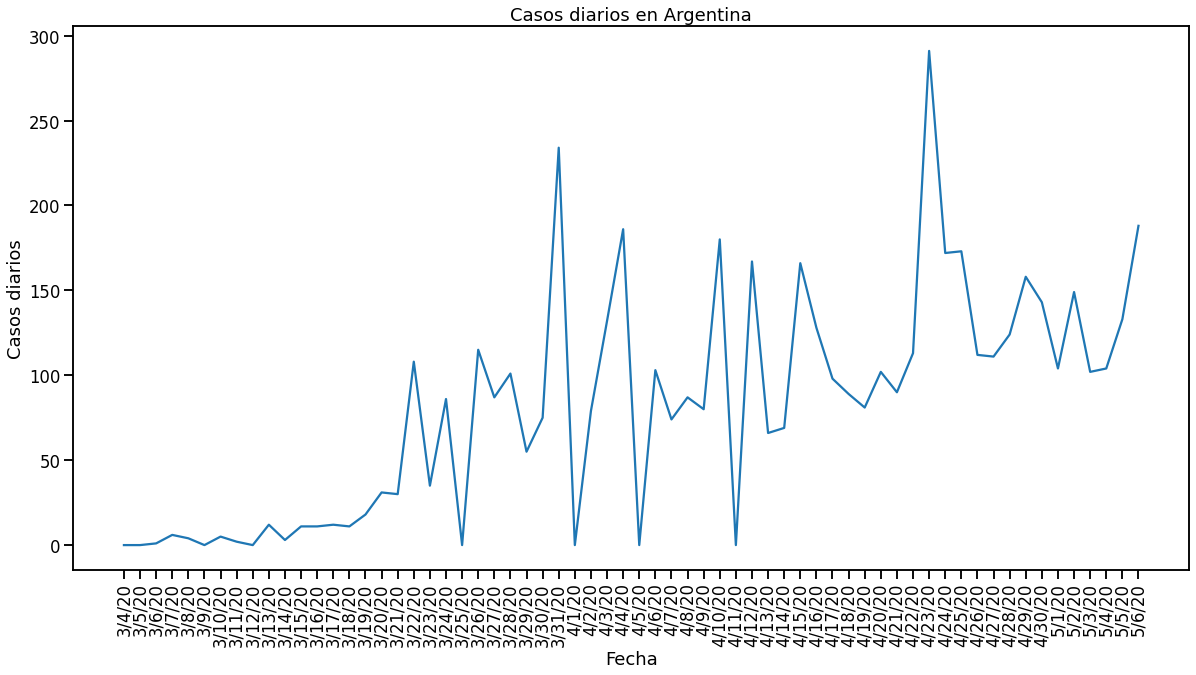

In [ ]:
#@title
#Item 3

import numpy as np

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.xlabel('Fecha')
plt.ylabel('Casos diarios')

plt.title('Casos diarios en Argentina')
x = casos_argentina.index[1:]
y = np.diff(casos_argentina.values)
plt.plot(x,y)

In [ ]:
# Recuperar datos desde el sitio mencionado:

# https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
# https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
# https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


In [ ]:
##Incorporar a un data frame de pandas los casos confirmados
##Agrupo por pais porque hay varias filas para un mismo pais y saco columnas que no sirven
##usar drop axis=1 y groupby por pais

#import pandas as pd
#df_covid_c = ?

## Mostrar qué información existe y en qué formato

#df_covid_c.describe()

In [ ]:
##Ver cómo visualizar un boxplot con los últimos tres días disponibles para los confirmados
##df_covid.boxplot(?)

In [ ]:
##Realizar un gráfico global del útimo día disponible de confirmados ordenado de menor a moyor por nro. de casos
##Utilizar sort_values by el último día disponible y graficar


In [ ]:
##Trasponer los confirmados para que quede paises como columnas y fechas como filas
##Usar transpose

In [ ]:
##Mostrar el describe para Argentina y gráfico ordenado por fecha

In [ ]:
##Boxplot para Argentina

In [ ]:
##Considerar para Argentina solo desde el comienzo de la casoso confirmados (t0)
##Y repetir para dos paises más
##Concatenar los data frame de manera de poder comparar entre ellos tomando como referencia el t0 de cada uno
##Para eso ver de agrear una columna Pais como 'Argentina'*cantidadDeCasosArgentina
##Filtar por cantidad de casos > 0
#df_covid_t0_Argentina=?
#df_covid_t0_Spain=?

#inidce pais canitdad de casos
#1 Argentina 5
#2 Argentina
#1 Italia 

In [ ]:
##Con Plotly
##Unir casos por pais y visualizar curvas por pais de confirmados
#import plotly.express as px
##Armar data frame con una colmna Pais y otra confimados, un pais debajo del otro
#df_confirmados=pd.concat([
#    df_covid_t0_Argentina,df_covid_t0_Chile, df_covid_t0_Italia, df_covid_t0_Spain
#],ignore_index=True).drop_duplicates().reset_index(drop=True)
#fig = px.line(df_confirmados,  y="Confirmados", color='Pais'..... 


In [ ]:
#La forma genérica finalmente sería
#Analizar y ver si se puede optimizar

dfg=pd.DataFrame()
df_covid_t0_p={}
cp = ['Argentina', 'Chile', 'Spain', 'Italy', 'China', 'Brazil', 'US', 'Australia']
#for c in df_covid_t.columns: # Selecciono algunos, porque con todos no se entiende el gráfico
for c in cp:
  dfp=df_covid_t0[c]
  dfp=dfp[dfp>0]
  cnp=dfp.count()
  colp=[c]*cnp
  dfp2=pd.DataFrame(dfp)
  dfp2.insert(1, "Pais", colp, True)
  dfp2.columns=['Confirmados', 'Pais']
  dfg=pd.concat([dfg ,dfp2],ignore_index=True).drop_duplicates().reset_index(drop=True)

fig = px.line(dfg,  y="Confirmados", color='Pais', title="Confirmados por pais (ref.T0)")
fig.show()

In [ ]:
##Mostrar los confirmados a la última fecha disponible


In [ ]:
##Idem anterior para recuperados y muetos
##Mostar en un mismo gráfcos confirmados, recuperados y muertos para Argentina
##craer dataframe pero ahora con columnas cantidad y estado

In [ ]:
#Utilizando geopy realizar mapa de confirmados 
#Se cambia el ícono para eso hay que descargar el ícono circle_red 
from geopy.geocoders import Nominatim
import folium
import base64
import io

mapa = folium.Map(location=(-34.6131516,	 -58.3772316), zoom_start=4)

for index,row in df_confirmed.iterrows(): 
  icon_url = 'https://upload.wikimedia.org/wikipedia/commons/9/9e/WX_circle_red.png'

  icon = folium.features.CustomIcon(icon_url,icon_size=(max(row['5/6/20']/10000,5), max(row['5/6/20']/10000, 5)))  # Creating a custom Icon

  folium.Marker(location=(row['Lat'],row['Long']),  icon=icon, tooltip=row[['Country/Region','5/6/20']].values).add_to(mapa)

display(mapa)


Más información en:

[Predictive Monitoring of COVID-19](https://ddi.sutd.edu.sg/)


In [ ]:
#Exportar a google spreadsheets para poder visulizar en google data studio
#!pip install df2gspread
import pandas as pd
import gspread
import df2gspread
import oauth2client.service_account  as sa
from df2gspread import df2gspread as d2g

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
#credentials = sa.ServiceAccountCredentials.from_json_keyfile_name(
#    '/content/covid-19-276115-43b7f0b225b3.json', scope)
gc = gspread.authorize(credentials)


dfg2=dfg
dfg2.insert(1, "Día", dfg2.index, True)
dfg2["Confirmados"]=pd.to_numeric(dfg2["Confirmados"])
dfg2["Día"]=pd.to_numeric(dfg2["Día"])

spreadsheet_key='1wyiwi0hmEkff-Y4b0w6kXT7CGYndu33MaIiHoZZiVgw'
wks_name='Master'
#d2g.upload(dfg2, spreadsheet_key, wks_name, credentials=credentials, col_names=True, row_names=True)